# model increase in pH as calcium increases using PHREEQC

In [1]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

In [2]:
function pH=pHfromCaT(CaT)

% equilibrium constants
Kw=10^-14; Ka1=10^-6.35; Ka2=10^-10.33; PCO2=10^-3.5; KH=10^-1.47;  

a=1;
b=2*CaT; %if there is initial alkalinity
c=-KH*Ka1*PCO2-Kw;
d=-2*KH*Ka1*Ka2*PCO2;
t=roots([a b c d]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);

end

In [3]:
database=['phreeqc.dat'];

%input info (mineral, total and species names, must match the PHREEQC database file !!!

%minerals=[{'CO2(g)'};{'Calcite'}]; % this is where you list the mineral phases to consider
minerals=[{'CO2(g)'}]; % this is where you list the mineral phases to consider
logCaT=-6:0.1:-1; %totalvector=[CaT; 2*CaT]; 
totalnames=[{'Ca'};{'Alkalinity'}]; 
T=25; % temperature in degree C (run 5 degrees C and 35 degrees C to see the differnece)
show=0; % this should show the PHREEQC output to the screen. works in Matlab but not Octave
speciesexport=[{'H+'}]; % need to tell what species we want to look at after the run
acid=[]; % not relevant for this problem
pH=7; pe=20.75-pH; % you need initial values for pH and pe (Redox condition).  they aren't used but can' be blank
pHfixcheck=0; %1 makes the pH fixed, 0 means pH is free to vary (same for pe).  here MUST be 0.  
%can't do fixed pH AND open without adding cations

In [4]:
for i=1:length(logCaT)
    CaT=10^logCaT(i);
    totalvector=[CaT; 2*CaT]; 
    [solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
    runPHREEQCv3(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid,pHfixcheck);
    H=solutionspeciesconcs(1); 
    pHphreeqc(i)=-log10(H);
    pHhand(i)=pHfromCaT(CaT);
end

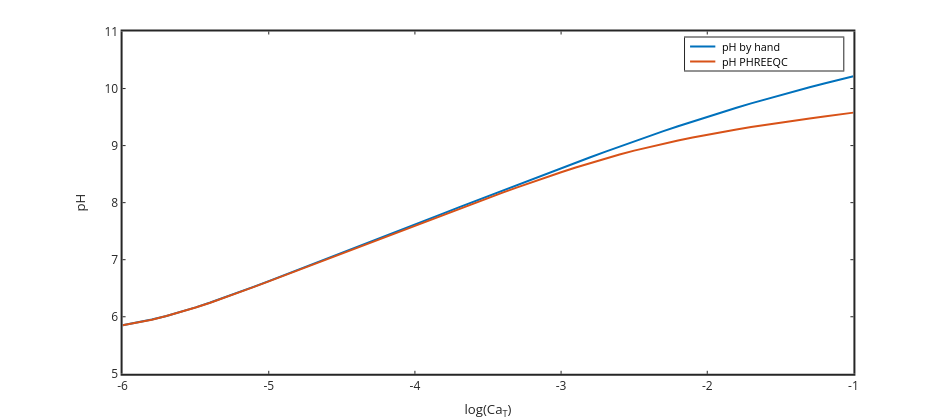

ERROR: received unknown message
Message type: usage_request


In [5]:
plot(logCaT,pHhand,'linewidth',2,logCaT,pHphreeqc,'linewidth',2)
 set(gca,'linewidth',2,'fontsize',12)
legend('pH by hand','pH PHREEQC')
xlabel('log(Ca_T)'); ylabel('pH')
